In [1]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RGQFTMultiplier

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

Number-1:  2
Number-2:  3


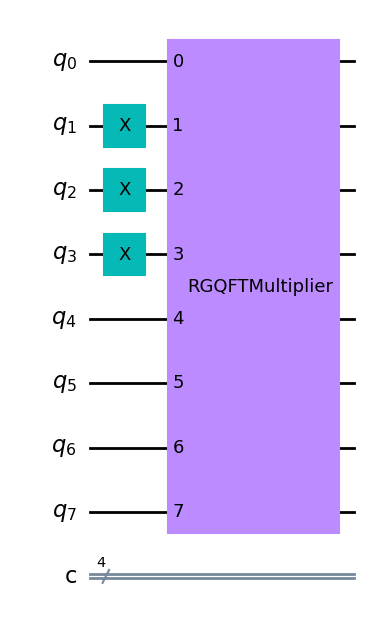

In [11]:
a = bin(int(input("Number-1: ")))[2:]
b = bin(int(input("Number-2: ")))[2:]

a,b = a[::-1], b[::-1]

m,n = len(a), len(b)

# if m>n:
#     b = '0'*(m-n) + b
# elif n>m:
#     a = '0'*(n-m) + a

q = QuantumRegister(4*n, 'q')
c = ClassicalRegister(2*n, 'c')

qc = QuantumCircuit(q, c)

for i,j in zip(range(m), range(n)):
    if a[i] == '1':
        qc.x(i)
    if b[j] == '1':
        qc.x(j+m)
        
circ = RGQFTMultiplier(num_state_qubits=2, num_result_qubits=4)

qc = qc.compose(circ)

qc.draw()

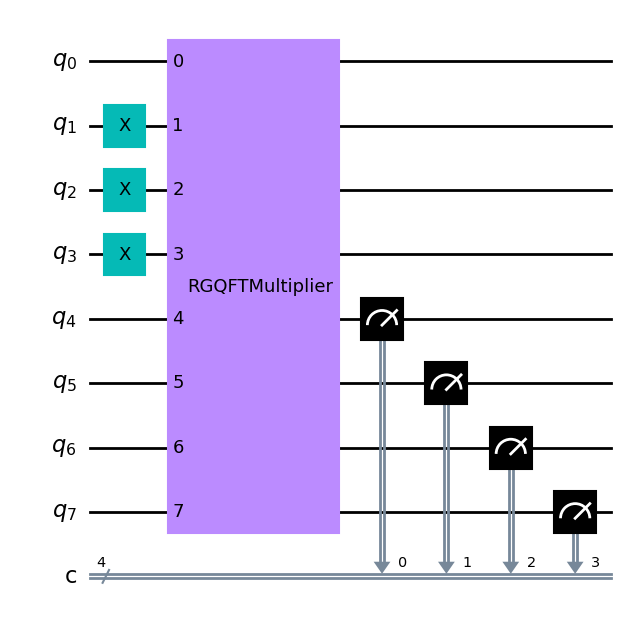

In [12]:
qc.measure([q[i] for i in range(4,8)], [c[i] for i in range(4)])
qc.draw()

In [13]:
backend = AerSimulator()
job = execute(qc, backend, shots=2000)
result = job.result()
counts = result.get_counts()
print('2*3')
print('---')
print(counts)

2*3
---
{'0110': 2000}


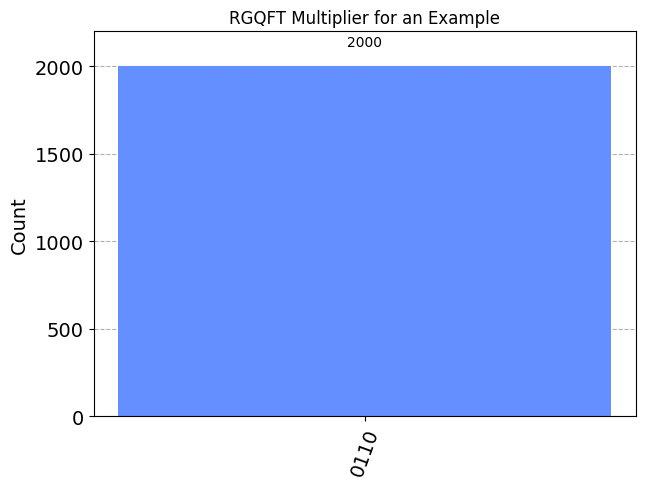

In [14]:
plot_histogram(counts, title="RGQFT Multiplier for an Example")

In [40]:
def QFT_Multiplier(a:str, b:str):
    
    a,b = a[::-1], b[::-1]

    p,q = len(a), len(b)

    if p>q:
        b = '0'*(p-q) + b
    elif q>p:
        a = '0'*(q-p) + a
        
    n = len(a)

    q = QuantumRegister(4*n, 'q')
    c = ClassicalRegister(2*n, 'c')

    qc = QuantumCircuit(q, c)

    for i,j in zip(range(len(a)), range(len(b))):
        if a[i] == '1':
            qc.x(i)
        if b[j] == '1':
            qc.x(j+len(a))

    circ = RGQFTMultiplier(num_state_qubits=n, num_result_qubits=2*n)

    qc = qc.compose(circ)
    
    qc.measure(q[2*n:], c)
    
    return qc

In [34]:
a = bin(int(input("Number-1: ")))[2:]
b = bin(int(input("Number-2: ")))[2:]

m,n = len(a), len(b)

if m>n:
    b = '0'*(m-n) + b
elif n>m:
    a = '0'*(n-m) + a
print("a: ", a)
print("b: ", b)

Number-1:  4
Number-2:  7


a:  100
b:  111


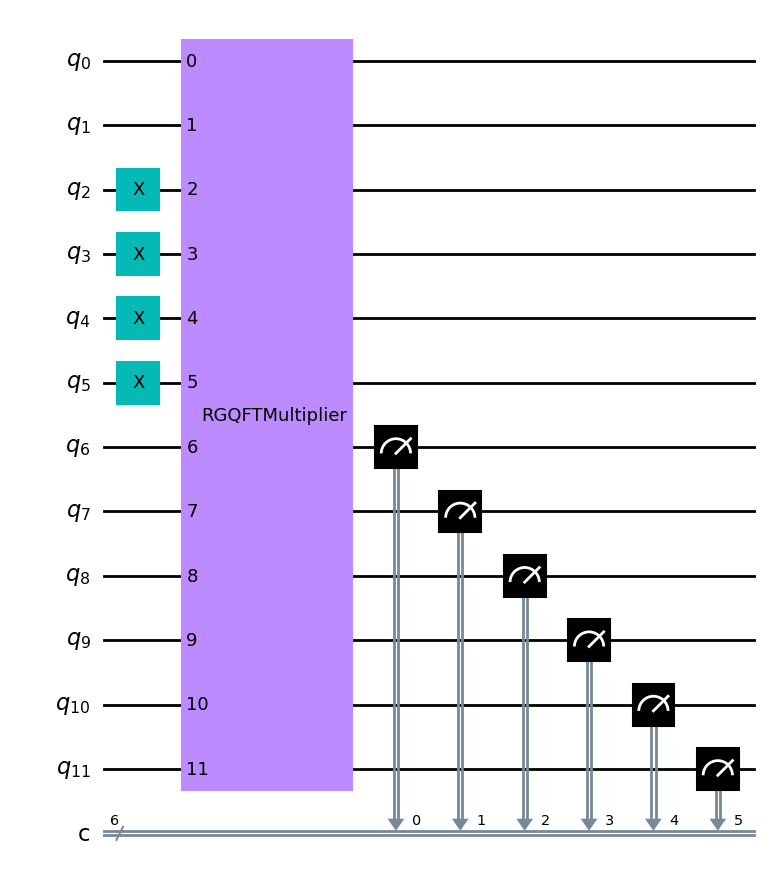

In [41]:
qft_multiplier = QFT_Multiplier(a, b)
qft_multiplier.draw()

In [42]:
job1 = execute(qft_multiplier, backend, shots=2000)
result1 = job1.result()
counts1 = result1.get_counts()
print(a+'*'+b)
print('---')
print(counts1)

100*111
---
{'011100': 2000}


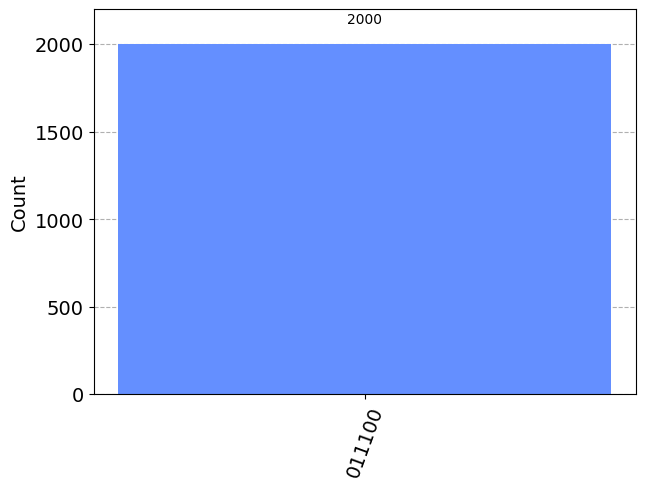

In [49]:
plot_histogram(counts1)

In [33]:
editor = CircuitComposer()
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f04435ec430>)

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)



In [2]:
RGQFTMultiplier??

Init signature:
RGQFTMultiplier(
    num_state_qubits: int,
    num_result_qubits: Optional[int] = None,
    name: str = 'RGQFTMultiplier',
) -> None
Source:        
class RGQFTMultiplier(Multiplier):
    r"""A QFT multiplication circuit to store product of two input registers out-of-place.

    Multiplication in this circuit is implemented using the procedure of Fig. 3 in [1], where
    weighted sum rotations are implemented as given in Fig. 5 in [1]. QFT is used on the output
    register and is followed by rotations controlled by input registers. The rotations
    transform the state into the product of two input registers in QFT base, which is
    reverted from QFT base using inverse QFT.
    As an example, a circuit that performs a modular QFT multiplication on two 2-qubit
    sized input registers with an output register of 2 qubits, is as follows:

    .. parsed-literal::

          a_0: ────────────────────────────────────────■───────■──────■──────■────────────────
            